Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0  8]]


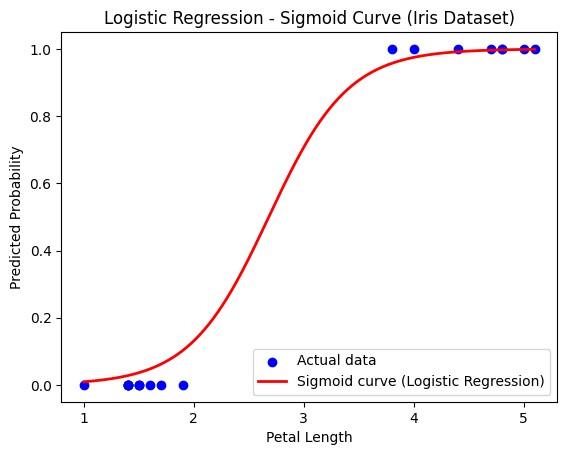

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


iris = load_iris()

mask = iris.target < 2
X = iris.data[mask, 2].reshape(-1, 1)  # Petal length
y = iris.target[mask].reshape(-1, 1)   # Binary target (0 or 1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train.ravel())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the sigmoid curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # Range of petal lengths
y_prob = model.predict_proba(X_range)[:, 1]  # Predicted probabilities for class 1

# Plot the sigmoid curve
plt.scatter(X_test, y_test, color='blue', label="Actual data")
plt.plot(X_range, y_prob, color='red', label='Sigmoid curve (Logistic Regression)', linewidth=2)
plt.xlabel('Petal Length')
plt.ylabel('Predicted Probability')
plt.legend()
plt.title('Logistic Regression - Sigmoid Curve (Iris Dataset)')
plt.show()